1. read random forest output as pd df
2. print number of rows
3. read LSTM output as pd df
4. print number of rows
5. merge the two pd df by row index
6. print the merged pd df

In [1]:
import pandas as pd

In [2]:
# 1. Read Random Forest output as pandas DataFrame
rf_df = pd.read_csv("13310850_site_pred_test.csv")  # Adjust filename/path as needed

#print(rf_df.columns)

rf_df.columns=['Unnamed: 0', 'Date', 'site', 'y_test', 'y_pred_best_rf']

print(rf_df)

# 2. Print number of rows in Random Forest DataFrame
print("Number of rows in Random Forest output:", len(rf_df))

     Unnamed: 0        Date      site  y_test  y_pred_best_rf
0           833  2022-07-15  13310850    10.2         10.0040
1           834  2022-07-16  13310850     9.9          9.9995
2           835  2022-07-17  13310850    10.1         10.0735
3           836  2022-07-18  13310850    10.0          8.6955
4           837  2022-07-19  13310850     9.0          8.8310
..          ...         ...       ...     ...             ...
204        1037  2024-08-27  13310850     7.9          7.9855
205        1038  2024-08-28  13310850     7.2          7.7855
206        1039  2024-08-29  13310850     6.7          7.8425
207        1040  2024-08-30  13310850     7.4          8.0750
208        1041  2024-08-31  13310850     8.0          8.8680

[209 rows x 5 columns]
Number of rows in Random Forest output: 209


In [3]:
# 3. Read LSTM output as pandas DataFrame
lstm_df = pd.read_csv("13310850summer_df.csv")  # Adjust filename/path as needed


lstm_df.columns= ['Unnamed: 0', 'tmean', 'site_no', 'Date', '00010_Mean', '00060_Mean',
       'Y_pred_LSTM', 'Y_test_original']

print(  lstm_df )

# 4. Print number of rows in LSTM DataFrame
print("Number of rows in LSTM output:", len(lstm_df))

     Unnamed: 0     tmean   site_no        Date  00010_Mean  00060_Mean  \
0          3958  0.547991  13310850  2022-07-18    0.791209    0.070183   
1          3959  0.592943  13310850  2022-07-19    0.681319    0.066678   
2          3960  0.714387  13310850  2022-07-20    0.747253    0.062823   
3          3961  0.719645  13310850  2022-07-21    0.736264    0.059231   
4          3962  0.671844  13310850  2022-07-22    0.747253    0.055551   
..          ...       ...       ...         ...         ...         ...   
201        4729  0.515354  13310850  2024-08-27    0.560440    0.001490   
202        4730  0.321301  13310850  2024-08-28    0.483516    0.001314   
203        4731  0.439685  13310850  2024-08-29    0.428571    0.001314   
204        4732  0.575173  13310850  2024-08-30    0.505495    0.000613   
205        4733  0.637406  13310850  2024-08-31    0.571429    0.000175   

     Y_pred_LSTM  Y_test_original  
0      10.158686             10.0  
1       8.718686           

In [4]:




# 5. Merge the two DataFrames by row index
#merged_df = pd.concat([rf_df, lstm_df], axis=1)

merged_df =pd.merge(rf_df, lstm_df, on='Date')

# 6. Print the merged DataFrame
print("Merged DataFrame:")
print(merged_df)


df = merged_df

df['Date'] = pd.to_datetime(df['Date'])

df=df[df['Date'].dt.year == 2024]

print(df)

Merged DataFrame:
     Unnamed: 0_x        Date      site  y_test  y_pred_best_rf  Unnamed: 0_y  \
0             836  2022-07-18  13310850    10.0          8.6955          3958   
1             837  2022-07-19  13310850     9.0          8.8310          3959   
2             838  2022-07-20  13310850     9.6          9.6545          3960   
3             839  2022-07-21  13310850     9.5          9.6445          3961   
4             840  2022-07-22  13310850     9.6          9.2990          3962   
..            ...         ...       ...     ...             ...           ...   
201          1037  2024-08-27  13310850     7.9          7.9855          4729   
202          1038  2024-08-28  13310850     7.2          7.7855          4730   
203          1039  2024-08-29  13310850     6.7          7.8425          4731   
204          1040  2024-08-30  13310850     7.4          8.0750          4732   
205          1041  2024-08-31  13310850     8.0          8.8680          4733   

        t

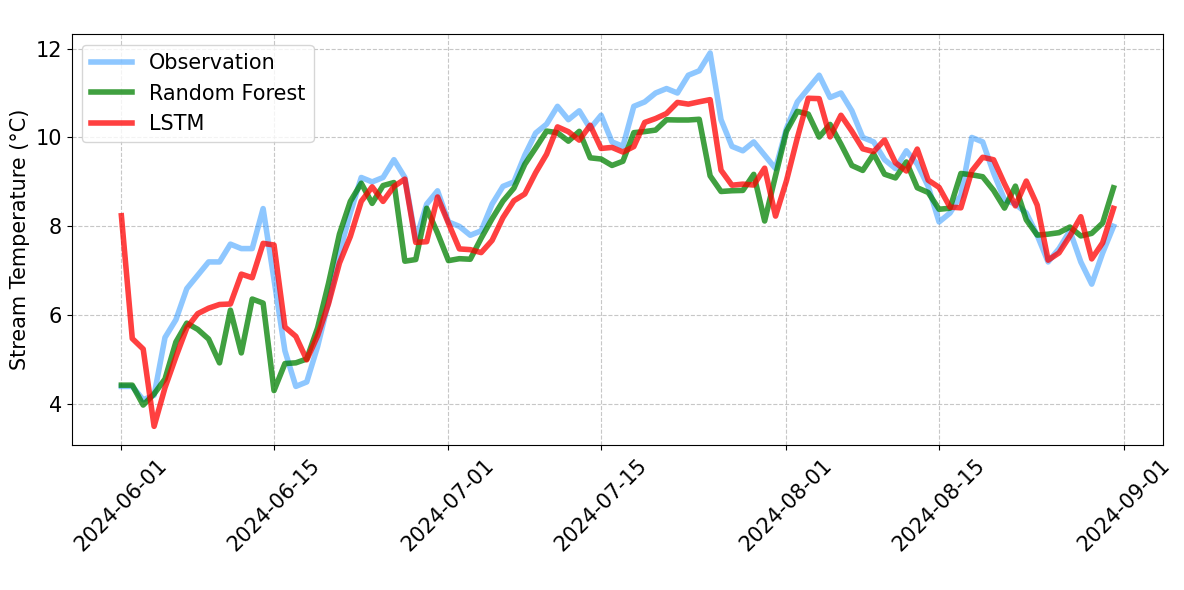

In [5]:
import matplotlib.pyplot as plt

fontsize = 15

linewidth = 4

ylab = 'Stream Temperature (°C)'

title = " "

fig_name = 'test_pred_OBS.png'

# Assuming df is your DataFrame with columns: Date, y_test, y_pred_best_rf, y_pred_LSTM
plt.figure(figsize=(12, 6))


# Plot each line
plt.plot(df['Date'], df['y_test'], label='Observation', color='dodgerblue', linewidth=linewidth , alpha=0.5 )
plt.plot(df['Date'], df['y_pred_best_rf'], label='Random Forest', color='green', linewidth=linewidth
         #, linestyle='--' 
         , alpha=0.75)
plt.plot(df['Date'], df['Y_pred_LSTM'], label='LSTM', color='red', linewidth=linewidth
         #, linestyle=':' 
         , alpha=0.75)

# Customize the plot
plt.title(' ', fontsize= fontsize )
plt.xlabel(' ', fontsize= fontsize )
plt.ylabel(ylab, fontsize= fontsize)
plt.legend(fontsize= fontsize)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks( fontsize = fontsize )
plt.yticks( fontsize = fontsize )
# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)


plt.tight_layout()

plt.savefig( fig_name )

plt.show()

plt.show()

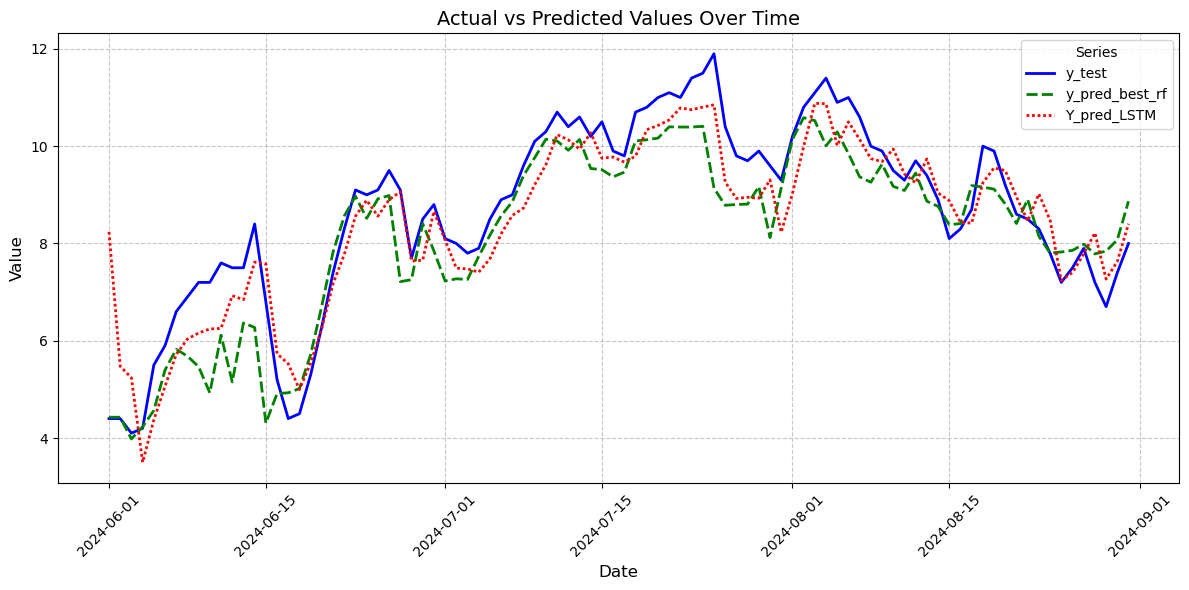

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Date', value_vars=['y_test', 'y_pred_best_rf', 'Y_pred_LSTM'], 
                    var_name='Series', value_name='Value')

# Create the plot
sns.lineplot(data=df_melted, x='Date', y='Value', hue='Series', style='Series', 
             palette={'y_test': 'blue', 'y_pred_best_rf': 'green', 'Y_pred_LSTM': 'red'},
             linewidth=2)

# Customize the plot
plt.title('Actual vs Predicted Values Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Series')
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()